In [14]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info: str

In [23]:
def start_play(state:State):
    print("srart play node called")
    return{"graph_info":state["graph_info"] +"I like to play"} 
def cricket(state:State):
    print("cricket node called")
    return{"graph_info":state["graph_info"] +"I like to play cricket"} 
def football(state:State):
    print("football node called")
    return{"graph_info":state["graph_info"] +"I like to play football"}


In [33]:
import random
from typing import Literal


def random_play(satate:State)->Literal['cricket','football']:
    if random.random()>0.5:
        return "cricket"
    else:
        return "football"



=== VISUAL FLOW DIAGRAM ===

Graph State: {"messages": [msg1, msg2, msg3]}
     ↓
tool_calling_llm(state) function called
     ↓
state["messages"] → [msg1, msg2, msg3] (extracted)
     ↓
llm_with_tools.invoke([msg1, msg2, msg3])
     ↓
LLM processes conversation history
     ↓
LLM generates response → AIMessage(content="...", tool_calls=[...])
     ↓
Function returns: {"messages": [new_ai_message]}
     ↓
add_messages reducer merges:
  OLD: [msg1, msg2, msg3]
  NEW: [new_ai_message]
     ↓
Updated Graph State: {"messages": [msg1, msg2, msg3, new_ai_message]}

=== ANALOGY ===
Think of it like a conversation:

1. You have a chat history (state['messages'])
2. You show the entire chat to an AI assistant (llm_with_tools.invoke())
3. The AI reads everything and gives you ONE new response
4. You add that response to your chat history
5. Now your chat history is longer by one message

The 'invoke' is like asking: 'Given this conversation, what should I say next?'

=== WHY THE LIST WRAPPING? 

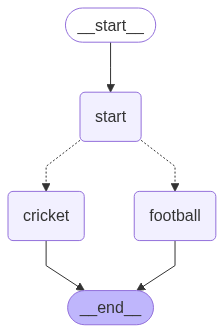

In [36]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.graph.message import add_messages
from IPython.display import Image,display
from langgraph.graph.message import add_messages




graph = StateGraph(State)
##add nodes
graph.add_node("start",start_play)
graph.add_node("cricket",cricket)
graph.add_node("football",football)

##add edges
graph.add_edge(START, "start")
graph.add_conditional_edges("start",random_play)
graph.add_edge("cricket", END)
graph.add_edge("football", END)


##compile the graph
graph_builder = graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [41]:
graph_builder.invoke({"graph_info":"my name is aly"})

srart play node called
cricket node called


{'graph_info': 'my name is alyI like to playI like to play cricket'}